# Question 1 : 

#  Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, 
#  consider one categorical variable in the dataset, and apply the classification task.   

 


# Dataset :  UCI ADULT INCOME

In [2]:
# Conversion of original data as follows:
# 1. Discretized agrossincome into two ranges with threshold 50,000.
# 2. Convert U.S. to US to avoid periods.
# 3. Convert Unknown to "?"
# 4. Run MLC++ GenCVFiles to generate data,test.

# Dataset Description

In [3]:
# Income: >50K, <=50K. 
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 
#             1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
#             Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 # relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
#                 Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, 
#                 France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, 
#                 Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note:

# Dataset is divided into 2 parts Training and Testing in later stage we will combine the dataset and do task as per the given
# specifications.

In [5]:
training = pd.read_csv("C:/Users/user/Desktop/tina/adult-training.csv") # Please Load adult-training.csv
testing = pd.read_csv("C:/Users/user/Desktop/tina/adult-test.csv")# Please Load adult-test.csv 

In [6]:
testing[:5]

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [7]:
columns =['age','workclass','fnlwgt','education','education-num','marital-status',
           'occupation','relationship','race','sex','capital-gain','capital-loss',
           'hours-per-week','native-country','income']

In [8]:
# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
training = pd.read_csv("C:/Users/user/Desktop/tina/adult-training.csv", header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
training = training.drop('fnlwgt', axis=1)

# Display several rows and shape of data set
display(training.head())
display(training.shape)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,35,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 14)

# Question 1.A

In [9]:
# a)	Provide the functional form of the predictive model for each algorithm.  

# Feature Engineering 

In [10]:
# Adding columns to the test data:

In [11]:
# Read in test data
testing = pd.read_csv("C:/Users/user/Desktop/tina/adult-test.csv", header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
testing = testing.drop('fnlwgt', axis=1)

In [12]:
testing[:2]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [13]:
testing.income[:2]

0    <=50K.
1     >50K.
Name: income, dtype: object

In [14]:
# Here we can see a dot at the endo of income and it will create problem during modelling and we must remove it. 

In [15]:
# Removing '.' in income column
testing['income'] = testing['income'].apply(lambda x: '>50K' if x=='>50K.' else '<=50K')

In [16]:
#
display(testing.head())
display(testing.shape)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


(16280, 14)

In [17]:
testing.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
training.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [19]:
training.value_counts()

age  workclass         education     education-num  marital-status      occupation         relationship  race   sex     capital-gain  capital-loss  hours-per-week  native-country  income
33   Private           HS-grad       9              Married-civ-spouse  Craft-repair       Husband       White  Male    0             0             40              United-States   <=50K     16
35   Private           HS-grad       9              Married-civ-spouse  Craft-repair       Husband       White  Male    0             0             40              United-States   <=50K     15
51   Private           HS-grad       9              Married-civ-spouse  Craft-repair       Husband       White  Male    0             0             40              United-States   <=50K     14
39   Private           HS-grad       9              Married-civ-spouse  Craft-repair       Husband       White  Male    0             0             40              United-States   <=50K     14
20   ?                 Some-college  10  

In [20]:
training.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [21]:
print(training.isnull().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [22]:
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [23]:
# Check missing value code and convert to NaNs
object_col = training.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(training[col].value_counts(dropna=False)/training.shape[0],'\n')

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64 

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64 

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital-status, dtype: floa

In [24]:
# Convert '?' to NaNs and remove the entries with NaN value
for col in object_col:
    training.loc[training[col]=='?', col] = np.nan
    testing.loc[testing[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = training.isna().sum()/training.shape[0]
col_missing_pct.sort_values(ascending=False)

occupation        0.056601
workclass         0.056386
native-country    0.017905
age               0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
income            0.000000
dtype: float64

In [25]:
# Remove data entries with missing value
training = training.dropna(axis=0, how='any')
testing = testing.dropna(axis=0, how='any')


In [26]:
training.isna().count()

age               30162
workclass         30162
education         30162
education-num     30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital-gain      30162
capital-loss      30162
hours-per-week    30162
native-country    30162
income            30162
dtype: int64

In [27]:
# Shape of train and test after dropping missing and other irrelavant columns

print("Training set: {} .".format(training.shape[0]))
print("Testing set: {} .".format(testing.shape[0]))
#training.shape().count()
#testing.shape().count()

Training set: 30162 .
Testing set: 15059 .


In [28]:
# Combine the Both Dataset
dataset = pd.concat([training, testing])

In [29]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,35,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16275,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


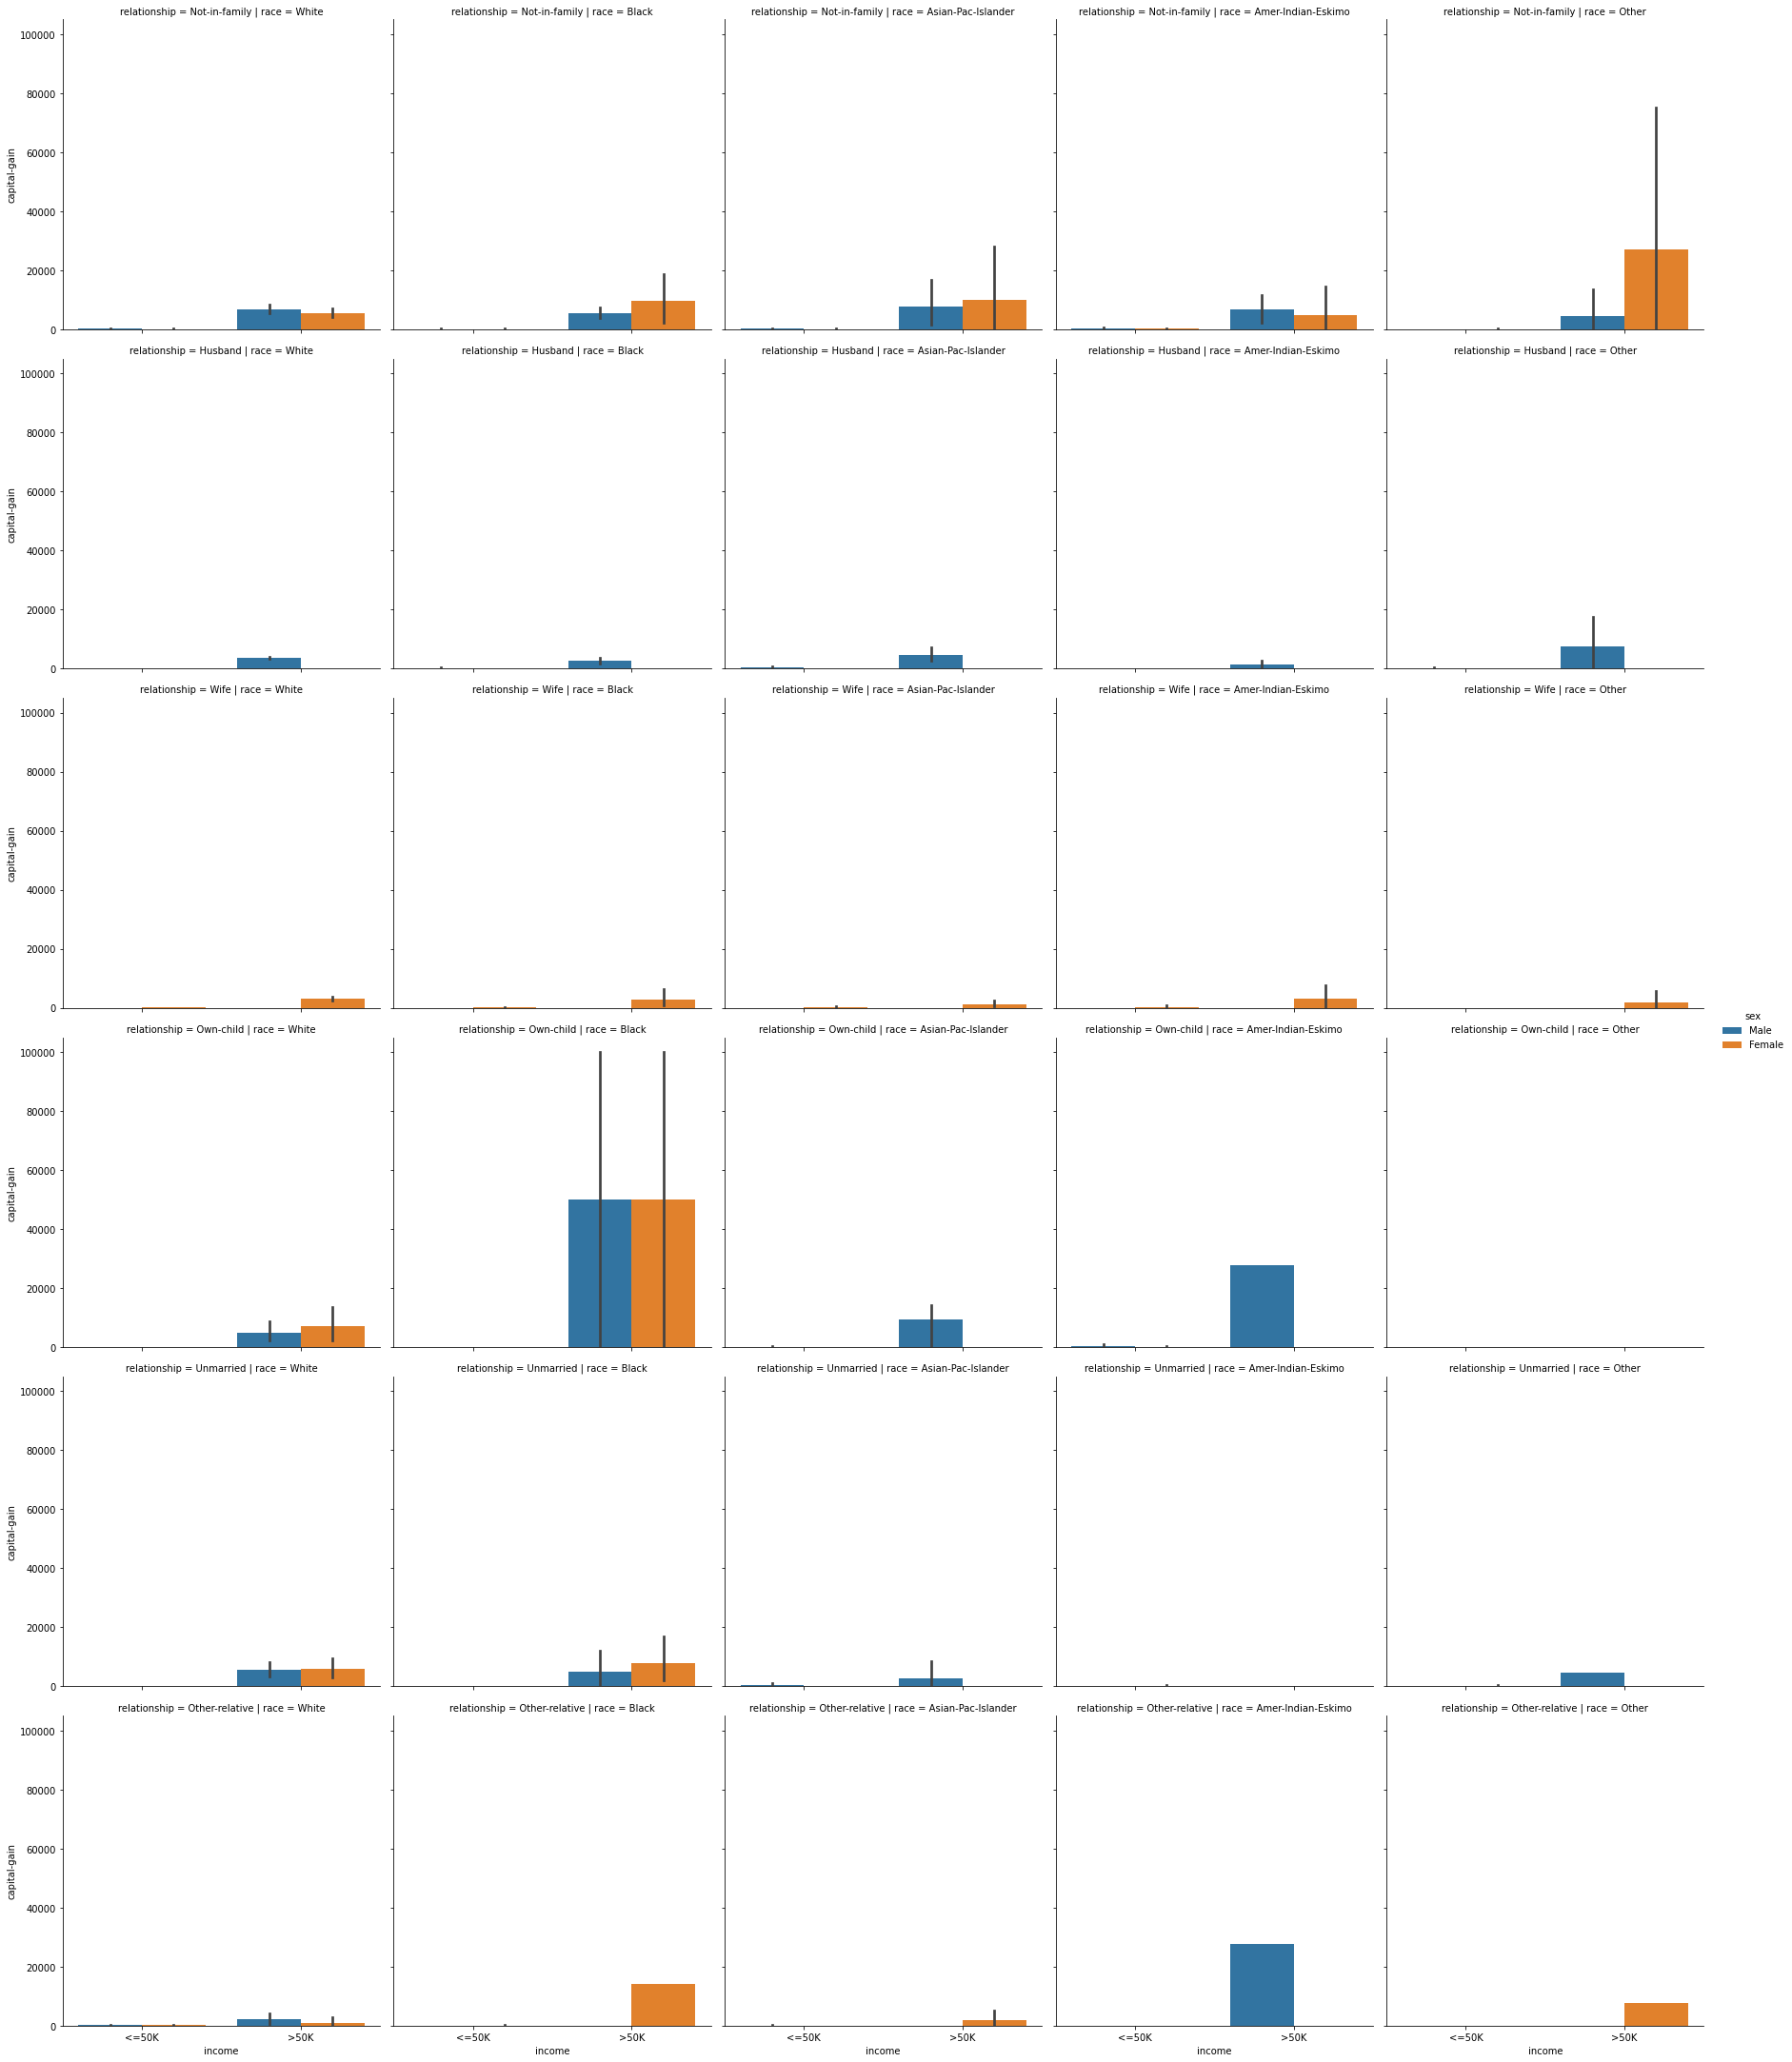

In [30]:
# Overview of the data which are more significant 
sns.catplot('income', 'capital-gain', hue='sex', data=dataset, kind='bar', col='race', row='relationship')

In [31]:
# https://www.geeksforgeeks.org/matplotlib-axis-axis-get_majorticklocs-function-in-python/

C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


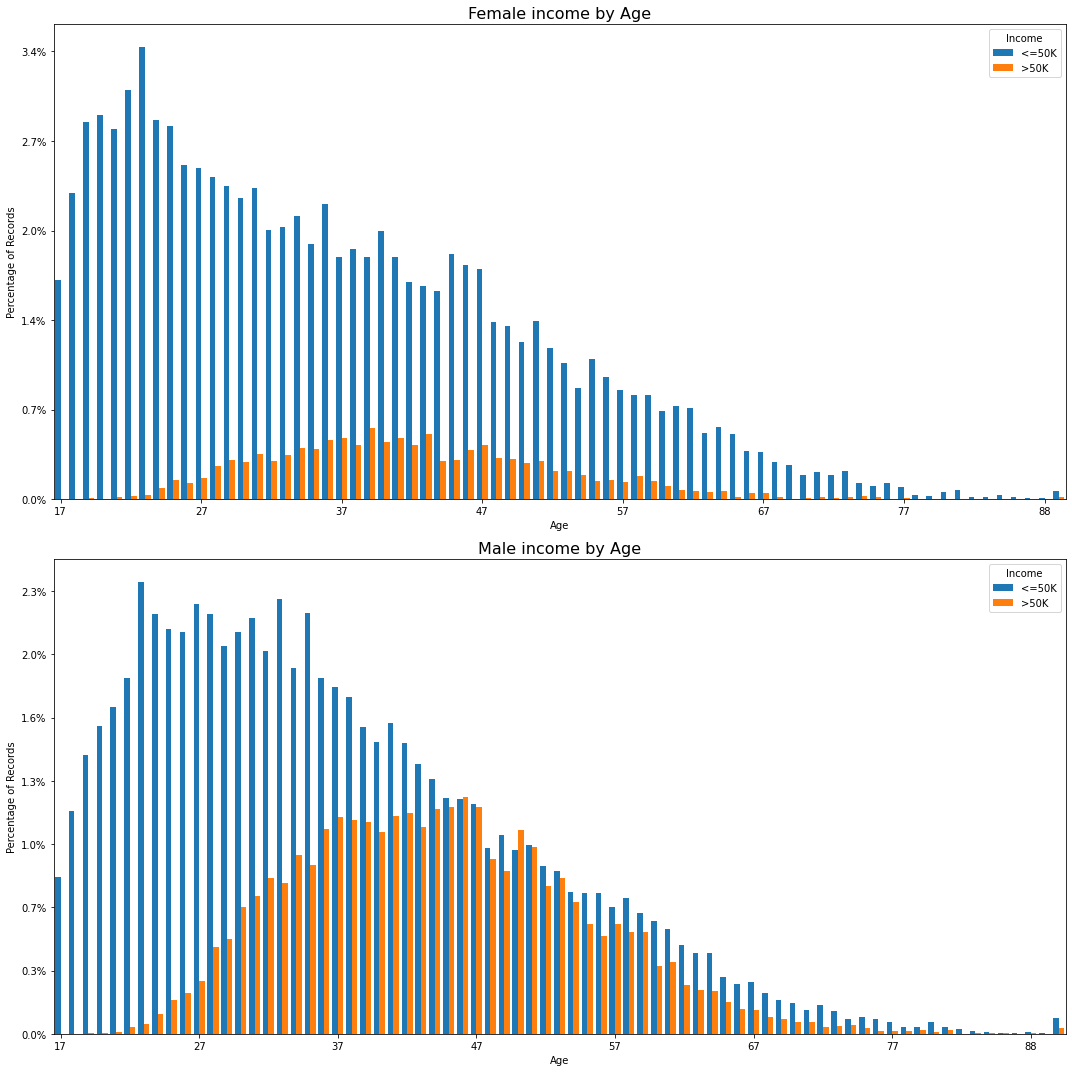

In [32]:
fig, ax =plt.subplots(2,1, figsize = (15, 15))


# Initialize the Plot
sns.countplot(x = 'age', hue = 'income', data = dataset[dataset.sex=='Female'], saturation=1, ax=ax[0])
sns.countplot(x = 'age', hue = 'income', data = dataset[dataset.sex=='Male'], saturation=1, ax=ax[1])

# Adding the  titles
ax[0].set_title('Female income by Age', loc='center', fontsize = 16)
ax[1].set_title('Male income by Age', loc='center', fontsize = 16)

# Adding the labels
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Percentage of Records")
ax[1].set_ylabel("Percentage of Records")

# Adding the  x_axis ticks
new_ticks = [i.get_text() for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0, len(new_ticks), 10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0, len(new_ticks), 10))
ax[1].set_xticklabels(new_ticks[::10])


# Modify y_axis ticks by get_majorticklocks method to get the propotion
female = dataset[dataset.sex=='Female'].shape[0]*1.
male = dataset[dataset.sex=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/female))#
ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/male))# 

# Change legend location
ax[0].legend(loc=1, title='Income')
ax[1].legend(loc=1, title='Income')

fig.tight_layout()
fig.show()

In [33]:
number_of_records = dataset.shape[0]# column # Total number of records
# Number of records where Adults making more than 50k $
income_greaterthan_50k = np.sum(dataset.income=='>50K')
# Number of records where Adults incomre is less than 50k $
income_lessthan_50k = np.sum(dataset.income=='<=50K')
# Percentage of Adults whose income is more than 50k $
greater_percentage = round(np.mean(dataset.income=='>50K')*100.00, 2)
print("Total number of records in dataset: {}".format(number_of_records))
print("Adults making more than $50,000: {}".format(income_greaterthan_50k))
print("Aduls making less than  $50,000: {}".format(income_lessthan_50k))
print("Percentage of Adults making more than $50,000: {}%".format(greater_percentage))

Total number of records in dataset: 45221
Adults making more than $50,000: 11208
Aduls making less than  $50,000: 34013
Percentage of Adults making more than $50,000: 24.78%


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


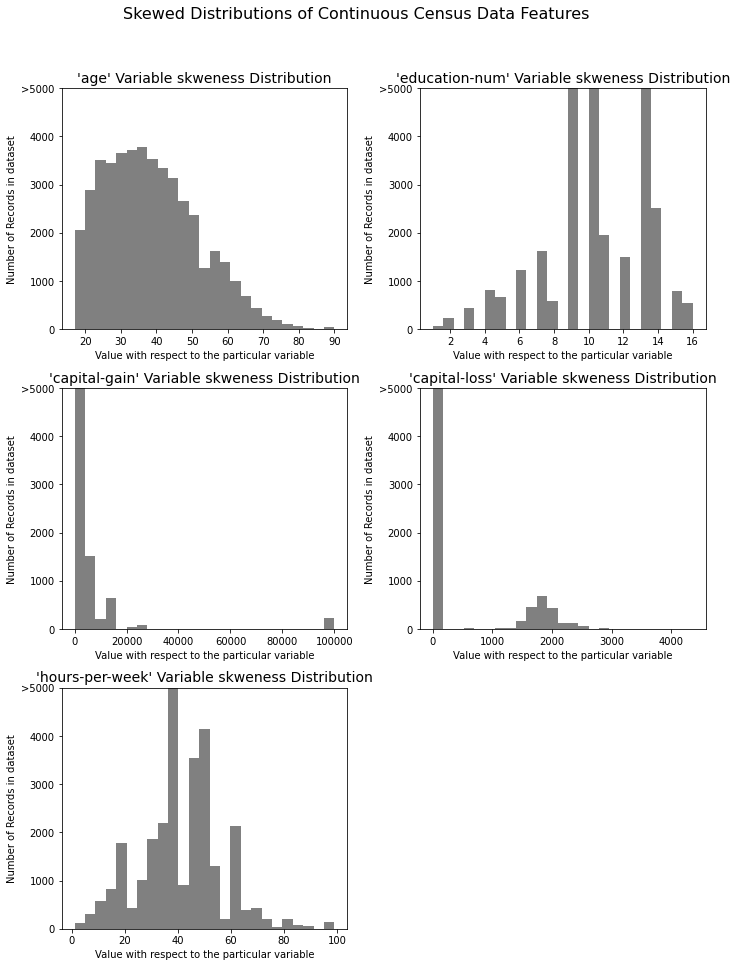

In [34]:
# Checking of the SKEWNESS in numerical variables in data set
skewness = dataset.dtypes[dataset.dtypes != 'object'].index # choosing the entire dataset except the object : which are strings

fig = plt.figure(figsize = (10,13)); #creating a figure

# Skewed feature plotting
for i, feature in enumerate(dataset[skewness]):
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(dataset[feature], bins = 25, color = 'gray')# histogram 
    ax.set_title("'%s' Variable skweness Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value with respect to the particular variable")
    ax.set_ylabel("Number of Records in dataset")
    ax.set_ylim((0, 5000)) # limits 
    ax.set_yticks([0, 1000, 2000, 3000,4000,5000]) #levels of records 
    ax.set_yticklabels([0, 1000, 2000, 3000,4000, ">5000"])

fig.suptitle("Skewed Distributions of Continuous Census Data Features", fontsize = 16 , y = 1.03)# extended plot title with size and the gap between the subplots
fig.tight_layout()
fig.show()

In [35]:
# SKEWNESS Calculation in the dataset(Numeric Variables)

skew_test = dataset[skewness].skew().sort_values(ascending=False)
skewness_result = pd.DataFrame({'Skew': skew_test})
skewness_result

,Skew
capital-gain,11.788871
capital-loss,4.516247
age,0.532857
hours-per-week,0.340536
education-num,-0.310674


In [36]:
# Label Encoding

In [37]:
# https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['workclass']= le.fit_transform(dataset['workclass'])
dataset['education']= le.fit_transform(dataset['education'])
dataset['marital-status']= le.fit_transform(dataset['marital-status'])
dataset['occupation']= le.fit_transform(dataset['occupation'])
dataset['relationship']= le.fit_transform(dataset['relationship'])
dataset['race']= le.fit_transform(dataset['race'])
dataset['sex']= le.fit_transform(dataset['sex'])
dataset['native-country']= le.fit_transform(dataset['native-country'])
dataset['income']= le.fit_transform(dataset['income'])


In [39]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,35,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,2,9,13,4,9,3,4,1,0,0,40,38,0
16275,39,2,9,13,0,9,1,4,0,0,0,36,38,0
16277,38,2,9,13,2,9,0,4,1,0,0,50,38,0
16278,44,2,9,13,0,0,3,1,1,5455,0,40,38,0


# Question 1.B

In [40]:
# 1.b) 	Train each model using different ratios of the trainset and visualize the performance of models using accuracy 
#      (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights

In [41]:
# Testing of Model Accuracy on Different Ratio of train set as follows, 
#  1. 80: 20
#  2. 70 : 30
#  3. 60: 40

# 1.b).1  Datset splitting on 80: 20

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

In [43]:
# testing and training splitting 

In [44]:
x2= dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
y2= dataset['income']

In [45]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.20, shuffle= True)
print("X2-Train Shape: ", x2_train.shape,'\n' "Y2-Train Shape(Dependent):", y2_train.shape)
print("X2-Test Shape: ", x2_test.shape,'\n' "Y2-Test Shape(Dependent):", y2_test.shape)

X2-Train Shape:  (36176, 13) 
Y2-Train Shape(Dependent): (36176,)
X2-Test Shape:  (9045, 13) 
Y2-Test Shape(Dependent): (9045,)


In [46]:
from sklearn.ensemble import RandomForestClassifier # Random Forest Classification Import Statement
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classification Import Statement
from sklearn.naive_bayes import MultinomialNB # NaiveBayes Multinomial Import Statement

In [47]:
######  Random Forest Classifier  ####### 

print("####  Random Forest #####")
rfc = RandomForestClassifier(n_estimators=250)

rfc.fit(x2_train, y2_train)
pred_rfc2 = rfc.predict(x2_test)
print(classification_report(y2_test, pred_rfc2))

######  AdaBoost ####### 

print("####  AdaBoost #####")
adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
adboost.fit(x2_train, y2_train)
y2_pred_adboost = adboost.predict(x2_test)
print(classification_report(y2_test, y2_pred_adboost))

####  Naive Bayes #####

print("####  Naive Bayes #####")
model = MultinomialNB(alpha=0.005)
model.fit(x2_train, y2_train)
Nb_y2_pred = model.predict(x2_test)
print(classification_report(y2_test, Nb_y2_pred))
pd.DataFrame(classification_report(y2_test, Nb_y2_pred, output_dict=True)).T
cm = pd.DataFrame(confusion_matrix(y2_test, Nb_y2_pred))
cm

####  Random Forest #####
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6770
           1       0.72      0.63      0.67      2275

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045

####  AdaBoost #####
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6770
           1       0.77      0.60      0.68      2275

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045

####  Naive Bayes #####
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      6770
           1       0.62      0.21      0.31      2275

    accuracy                           0.77      9045
   macro avg       0.70      0.58      0.59      9045
wei

,0,1
0,6482,288
1,1796,479


In [181]:
final2 = pd.DataFrame({'MODELS': ["RANDOM FOREST","AdaBoost-Classification", "NaiveBayes"],
'ACCURACY OF 80/20': [accuracy_score(y2_test,pred_rfc2),accuracy_score(y2_test, y2_pred_adboost), accuracy_score(y2_test, Nb_y2_pred)],
 })

In [183]:
end21= final2.sort_values(by='ACCURACY OF 80/20', ascending=False)
end_all11 = end21.set_index('ACCURACY OF 80/20')
end_all11


,MODELS
ACCURACY OF 80/20,
0.855058,AdaBoost-Classification
0.844776,RANDOM FOREST
0.769596,NaiveBayes


# 1.b).2  Datset splitting on 70: 30

In [50]:
x3= dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
y3= dataset['income']

In [51]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.20, shuffle= True)
print("X3-Train Shape: ", x3_train.shape,'\n' "Y3-Train Shape(Dependent):", y3_train.shape)
print("X3-Test Shape: ", x3_test.shape,'\n' "Y3-Test Shape(Dependent):", y3_test.shape)

X3-Train Shape:  (36176, 13) 
Y3-Train Shape(Dependent): (36176,)
X3-Test Shape:  (9045, 13) 
Y3-Test Shape(Dependent): (9045,)


In [52]:
######  Random Forest Classifier  ####### 
print("####  Random Forest #####")
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(x3_train, y3_train)
pred_rfc3 = rfc.predict(x3_test)
print(classification_report(y3_test, pred_rfc3))

######  AdaBoost ####### 
print("####  AdaBoost #####")
adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
adboost.fit(x3_train, y3_train)
y3_pred_adboost = adboost.predict(x3_test)
print(classification_report(y3_test, y3_pred_adboost))

####  Naive Bayes #####
print("####  Naive Bayes #####")
model = MultinomialNB(alpha=0.005)
model.fit(x3_train, y3_train)
Nb_y3_pred = model.predict(x3_test)
print(classification_report(y3_test, Nb_y3_pred))
pd.DataFrame(classification_report(y3_test, Nb_y3_pred, output_dict=True)).T
cm = pd.DataFrame(confusion_matrix(y3_test, Nb_y3_pred))
cm

####  Random Forest #####
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6801
           1       0.72      0.63      0.67      2244

    accuracy                           0.85      9045
   macro avg       0.80      0.78      0.79      9045
weighted avg       0.84      0.85      0.84      9045

####  AdaBoost #####
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6801
           1       0.77      0.58      0.66      2244

    accuracy                           0.85      9045
   macro avg       0.82      0.76      0.78      9045
weighted avg       0.85      0.85      0.85      9045

####  Naive Bayes #####
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      6801
           1       0.61      0.20      0.30      2244

    accuracy                           0.77      9045
   macro avg       0.70      0.58      0.58      9045
wei

,0,1
0,6521,280
1,1799,445


In [184]:
final3 = pd.DataFrame({'MODELS': ["RANDOM FOREST","AdaBoost-Classification", "NaiveBayes"],
'ACCURACY OF 70/30': [accuracy_score(y3_test,pred_rfc3),accuracy_score(y3_test, y3_pred_adboost), accuracy_score(y3_test, Nb_y3_pred)],
 })

In [185]:
end3= final3.sort_values(by='ACCURACY OF 70/30', ascending=False)
end_all2 = end3.set_index('ACCURACY OF 70/30')
end_all2

,MODELS
ACCURACY OF 70/30,
0.852847,AdaBoost-Classification
0.847098,RANDOM FOREST
0.770149,NaiveBayes


# 1.b).3  Datset splitting on 60: 40

In [55]:
x4= dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
y4= dataset['income']

In [56]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.20, shuffle= True)
print("X4-Train Shape: ", x4_train.shape,'\n' "Y4-Train Shape(Dependent):", y4_train.shape)
print("X4-Test Shape: ", x4_test.shape,'\n' "Y4-Test Shape(Dependent):", y4_test.shape)

X4-Train Shape:  (36176, 13) 
Y4-Train Shape(Dependent): (36176,)
X4-Test Shape:  (9045, 13) 
Y4-Test Shape(Dependent): (9045,)


In [165]:
######  Random Forest Classifier  ####### 
print("####  Random Forest #####")
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(x4_train, y4_train)
pred_rfc4 = rfc.predict(x4_test)
print(classification_report(y4_test, pred_rfc4))

######  AdaBoost ####### 
print("####  AdaBoost #####")
adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
adboost.fit(x4_train, y4_train)
y4_pred_adboost = adboost.predict(x4_test)
print(classification_report(y4_test, y4_pred_adboost))

####  Naive Bayes #####
print("####  Naive Bayes #####")
model = MultinomialNB(alpha=0.005)
model.fit(x4_train, y4_train)
Nb_y4_pred = model.predict(x4_test)
print(classification_report(y4_test, Nb_y4_pred))
pd.DataFrame(classification_report(y4_test, Nb_y4_pred, output_dict=True)).T
cm = pd.DataFrame(confusion_matrix(y4_test, Nb_y4_pred))
cm

####  Random Forest #####
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6706
           1       0.73      0.61      0.67      2339

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045

####  AdaBoost #####
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6706
           1       0.78      0.60      0.68      2339

    accuracy                           0.85      9045
   macro avg       0.83      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045

####  Naive Bayes #####
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      6706
           1       0.66      0.22      0.33      2339

    accuracy                           0.77      9045
   macro avg       0.72      0.59      0.59      9045
wei

,0,1
0,6442,264
1,1830,509


In [186]:
final4 = pd.DataFrame({'MODELS': ["RANDOM FOREST","AdaBoost-Classification", "NaiveBayes"],
'ACCURACY OF 60/40': [accuracy_score(y4_test,pred_rfc4),accuracy_score(y4_test, y4_pred_adboost), accuracy_score(y4_test, Nb_y4_pred)],
})


In [187]:
end2= final4.sort_values(by='ACCURACY OF 60/40', ascending=False)
end_all1 = end2.set_index('ACCURACY OF 60/40')
end_all1

,MODELS
ACCURACY OF 60/40,
0.853621,AdaBoost-Classification
0.841902,RANDOM FOREST
0.768491,NaiveBayes


In [63]:
# 2.  Consider a continuous attribute in your dataset as the target variable, 
#     perform regression analysis using different ensemble methods, visualize and interpret the results. 

# Question 1-C

In [64]:
#  visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). 
#  Elaborate on the insights.                               

In [65]:
# 1.c)  Apply ensemble methods (bagging, boosting, stacking) on the base models, 
#     evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models 
#     using Boxplot.                                                                                              

# Ensemble : Bagging, Boosting, Stacking

In [66]:
x= dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
y= dataset['income']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, shuffle= True)
print("X-Train Shape: ", x_train.shape,'\n' "Y-Train Shape(Dependent):", y_train.shape)
print("X-Test Shape: ", x_test.shape,'\n' "Y-Test Shape(Dependent):", y_test.shape)

X-Train Shape:  (29393, 13) 
Y-Train Shape(Dependent): (29393,)
X-Test Shape:  (15828, 13) 
Y-Test Shape(Dependent): (15828,)


# Random Forest 

In [68]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11903
           1       0.70      0.62      0.66      3925

    accuracy                           0.84     15828
   macro avg       0.79      0.77      0.78     15828
weighted avg       0.84      0.84      0.84     15828



In [69]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(y_test,pred_rfc ))
mse= mean_squared_error(y_test,pred_rfc)
r2 = r2_score(y_test,pred_rfc)

print("Root Mean Square Error:", rmse)
print("Mean Square Error:", mse)
print("R-squared Value:",r2)

Root Mean Square Error: 0.39893401046487004
Mean Square Error: 0.15914834470558503
R-squared Value: 0.1465892396660694


[[10883  1020]
 [ 1499  2426]]


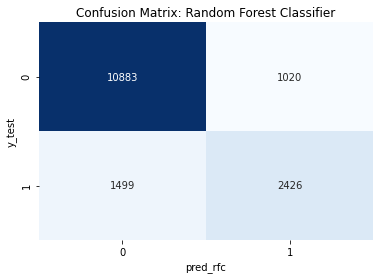

In [70]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred_rfc)
print(cm)

sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("pred_rfc")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Random Forest Classifier")
plt.show()

In [71]:
print("Random Forest Accuracy: ",accuracy_score(y_test,pred_rfc))
print(classification_report(y_test, pred_rfc))

Random Forest Accuracy:  0.840851655294415
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11903
           1       0.70      0.62      0.66      3925

    accuracy                           0.84     15828
   macro avg       0.79      0.77      0.78     15828
weighted avg       0.84      0.84      0.84     15828



# 100 Monte Corlo Runs for Random Forest

In [72]:
import warnings
warnings.simplefilter('ignore')

acc2 = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=20)
    rfc.fit(x_train, y_train)
    pred_rfc = rfc.predict(x_test)
    pred2 = [] 
    for x in pred_rfc: 
        if x > 0.5:
            pred2.append(1)
        else:
            pred2.append(0) 
    pred2
    c=accuracy_score(y_test,pred_rfc)
    acc2.append(c)
print("Accuracy using 100 MC run:", np.mean(acc2)) 

Accuracy using 100 MC run: 0.8386511245893353


In [73]:
model2= pd.DataFrame({'MODEL':[" Random Forest 100 Monte Carlo Runs"],'ACCURACY':[np.mean(acc2)*100] })
model2


,MODEL,ACCURACY
0,Random Forest 100 Monte Carlo Runs,83.865112


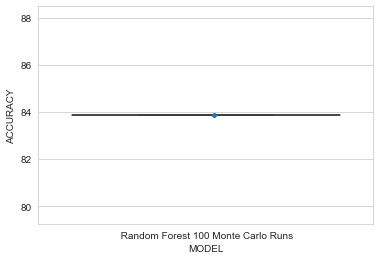

In [74]:
# box plot for # 100 Monte Carlo Runs for RANDOM FOREST mean of Accuracy :
sns.set_style('whitegrid')

ax= sns.boxplot(x="MODEL",y=("ACCURACY"),data=model2)
ax = sns.stripplot(x="MODEL", y=("ACCURACY"),data=model2)
plt.show(sns)

# Adaptive Boosting

In [ ]:

# In our case, the final goal is to predict if the individual will have salary above 50K or not. 
# AdaBoost, as one of the boosting algorithm, it focuses on classification problems and aims 
# to convert a set of weak classifiers into a strong one. 

In [75]:
#AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
adboost.fit(x_train, y_train)
y_pred_adboost = adboost.predict(x_test)
print(classification_report(y_test, y_pred_adboost))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11903
           1       0.76      0.60      0.67      3925

    accuracy                           0.85     15828
   macro avg       0.82      0.77      0.79     15828
weighted avg       0.85      0.85      0.85     15828



In [76]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test,y_pred_adboost ))
mse= mean_squared_error(y_test,y_pred_adboost)
r2 = r2_score(y_test,y_pred_adboost)

print("Root Mean Square Error:", rmse)
print("Mean Square Error:", mse)
print("R-squared Value:",r2)

Root Mean Square Error: 0.3834291888811085
Mean Square Error: 0.14701794288602477
R-squared Value: 0.2116368244156187


In [77]:
print("Accuarcy :", accuracy_score(y_test, y_pred_adboost))

Accuarcy : 0.8529820571139752


       0     1
0  11137   766
1   1561  2364


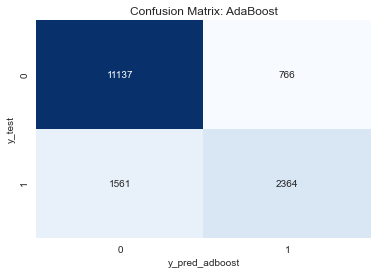

In [78]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred_adboost))
print(cm)

sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("y_pred_adboost")
plt.ylabel("y_test")
plt.title("Confusion Matrix: AdaBoost")
plt.show()

# 100 Monte Carlo Runs for Ada Boost

In [79]:
#  Monte Carlo Simulators are used to model the probability of different outcomes in a process that cannot easily be 
#  predicted due to interventiion of random variables , It is a Technique used to uindestand the impact of risk 
#  and uncertanity in prediction and forecasting models.

In [80]:
acc = []
for i in range(100):
  adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
  adboost.fit(x_train, y_train)
  y_pred_adboost = adboost.predict(x_test) 
  pred = [] 
  for x in y_pred_adboost:
    if x > 0.5:
      pred.append(1)
    else:
        pred.append(0) 
  pred
  a=accuracy_score(y_test, y_pred_adboost)
  acc.append(a)
print("Accuracy using 100 MC run:", np.mean(acc))   

Accuracy using 100 MC run: 0.852982057113975


In [81]:
model= pd.DataFrame({'MODEL':["AdaBoost 100 Monte Carlo Runs"],'ACCURACY':[np.mean(acc)*100] })


In [82]:
model

,MODEL,ACCURACY
0,AdaBoost 100 Monte Carlo Runs,85.298206


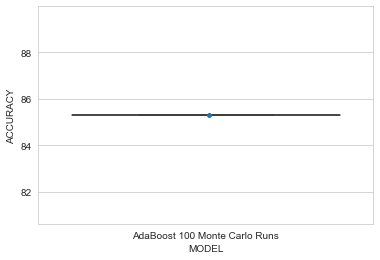

In [83]:
# box plot for # 100 Monte Carlo Runs for Ada Boost mean of Accuracy :
sns.set_style('whitegrid')

ax= sns.boxplot(x="MODEL",y=("ACCURACY"),data=model)
ax = sns.stripplot(x="MODEL", y=("ACCURACY"),data=model)
plt.show(sns)

# Naive Bayes

In [85]:
from sklearn.ensemble import StackingClassifier

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [87]:
model = MultinomialNB(alpha=0.005)
model.fit(x_train, y_train)
Nb_y_pred = model.predict(x_test)
pd.DataFrame(classification_report(y_test, Nb_y_pred, output_dict=True)).T
cm = pd.DataFrame(confusion_matrix(y_test, Nb_y_pred))
cm

,0,1
0,11396,507
1,3116,809


In [88]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test,Nb_y_pred ))
mse= mean_squared_error(y_test,Nb_y_pred)
r2 = r2_score(y_test,Nb_y_pred)

print("Root Mean Square Error:", rmse)
print("Mean Square Error:", mse)
print("R-squared Value:",r2)

Root Mean Square Error: 0.4784330205661568
Mean Square Error: 0.22889815516805662
R-squared Value: -0.22743437264383903


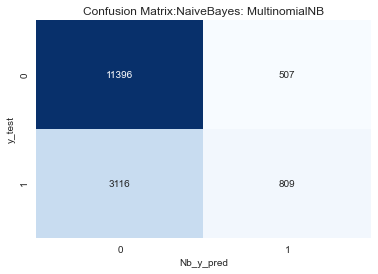

In [89]:
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("Nb_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix:NaiveBayes: MultinomialNB")
plt.show()

In [90]:
print("Accuracy Score", accuracy_score(y_test, Nb_y_pred))
print("Model Score: ", model.score(x_test, y_test))

Accuracy Score 0.7711018448319434
Model Score:  0.7711018448319434


# Model Validation using 100 Mc Runs for Naive Bayes

In [91]:
acc1 = []
for i in range(100):
    model = MultinomialNB(alpha=0.005)
    model.fit(x_train, y_train)
    Nb_y_pred = model.predict(x_test)
    
    pred1 = [] 
    for x in Nb_y_pred:
        if x > 0.5:
            pred1.append(1)
        else:
            pred1.append(0) 
    pred1
    a1=accuracy_score(y_test, Nb_y_pred)
    acc1.append(a1) 
print("Accuracy using 100 MC run:", np.mean(acc1)) 

Accuracy using 100 MC run: 0.7711018448319436


In [92]:
model1= pd.DataFrame({'MODEL':["NaiveBayes 100 Monte Carlo Runs"],'ACCURACY':[np.mean(acc1)*100] })
model1

,MODEL,ACCURACY
0,NaiveBayes 100 Monte Carlo Runs,77.110184


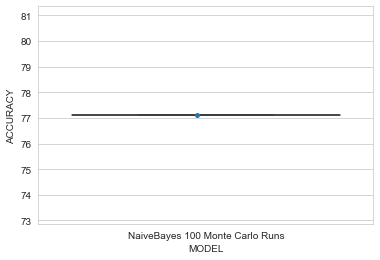

In [93]:
# box plot for # 100 Monte Carlo Runs for Naive Bayes mean of Accuracy :
sns.set_style('whitegrid')

ax= sns.boxplot(x="MODEL",y=("ACCURACY"),data=model1)
ax = sns.stripplot(x="MODEL", y=("ACCURACY"),data=model1)
plt.show(sns)

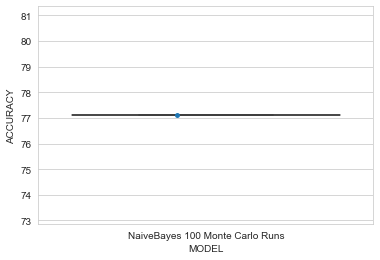

In [94]:
# box plot for # 100 Monte Carlo Runs for Ada Boost mean of Accuracy :
sns.set_style('whitegrid')

ax= sns.boxplot(x="MODEL",y=("ACCURACY"),data=model1)
ax = sns.stripplot(x="MODEL", y=("ACCURACY"),data=model1)
plt.show(sns)

# Overall Acuraccy of base Models (Random Forest, Ada Boost, Naive Bayes)

In [95]:
final5 = pd.DataFrame({'MODELS': ["RANDOM FOREST","AdaBoost-Classification", "NaiveBayes"],
'ACCURACY': [accuracy_score(y_test,pred_rfc),accuracy_score(y_test, y_pred_adboost), accuracy_score(y_test, Nb_y_pred)],
 'KEY POINTS IN MODEL' :[  "With 250 Number of trees in forest", "With 50 Estimators at which boosting is terminated","MultinomialNB, alpha=0.005" ]})

In [149]:
end1= final5.sort_values(by='ACCURACY', ascending=False)
end_all = end1.set_index('ACCURACY')
end_all

,MODELS,KEY POINTS IN MODEL
ACCURACY,,
0.852982,AdaBoost-Classification,With 50 Estimators at which boosting is termin...
0.839146,RANDOM FOREST,With 250 Number of trees in forest
0.771102,NaiveBayes,"MultinomialNB, alpha=0.005"


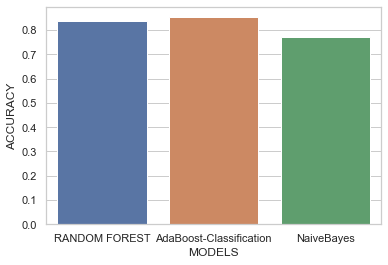

In [97]:
# bar plot 
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final5, x="MODELS", y="ACCURACY")


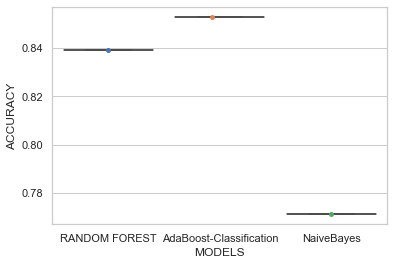

In [98]:
# box plot
sns.set_style('whitegrid')
ax= sns.boxplot(x="MODELS",y="ACCURACY",data=final5)
ax = sns.stripplot(x="MODELS", y="ACCURACY",data=final5)
plt.show(sns)

# Question-2

# Ensemble:  Regressor

In [99]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,35,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,2,9,13,4,9,3,4,1,0,0,40,38,0
16275,39,2,9,13,0,9,1,4,0,0,0,36,38,0
16277,38,2,9,13,2,9,0,4,1,0,0,50,38,0
16278,44,2,9,13,0,0,3,1,1,5455,0,40,38,0


In [100]:

x1= dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]
y1= dataset['income'] 

In [101]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.35, shuffle= True)
print("X-Train Shape: ", x1_train.shape,'\n' "Y-Train Shape(Dependent):", y1_train.shape)
print("X-Test Shape: ", x1_test.shape,'\n' "Y-Test Shape(Dependent):", y1_test.shape)

X-Train Shape:  (29393, 13) 
Y-Train Shape(Dependent): (29393,)
X-Test Shape:  (15828, 13) 
Y-Test Shape(Dependent): (15828,)


# Ensemble Bagging Regressor 

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [202]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Bagging Regressor: Linear Regression prediction

bagging_reg = BaggingRegressor(LinearRegression(), n_estimators=50, max_samples=300, bootstrap=True, n_jobs=-1)
bagging_reg.fit(x1_train,y1_train)
y1_pred = bagging_reg.predict(x1_test)
print('Accuracy ', r2_score(y1_test, y1_pred))

Accuracy  0.22025149109773223


In [203]:
# Model Evaluation for Bagging  Regressor
rmse0 = np.sqrt(mean_squared_error(y1_test,y1_pred  ))
mse0= mean_squared_error(y_test,y1_pred )
r20 = r2_score(y1_test,y1_pred )

print(" Bagging Regressor Root Mean Square Error:", rmse0)
print(" Bagging Regressor Mean Square Error:", mse0)
print("Bagging  Regressor R-squared Value:",r20)

 Bagging Regressor Root Mean Square Error: 0.3798852996702046
 Bagging Regressor Mean Square Error: 0.25602011085778015
Bagging  Regressor R-squared Value: 0.22025149109773223


# Voting regression

In [192]:
from sklearn.ensemble import VotingRegressor

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Prediction for Voting Regressor with Linear Regression, KNN Regression, SVR Regression

lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor(n_neighbors=5)
svr_reg = SVR(C=1000)

voting_reg = VotingRegressor(estimators=[('lr', lin_reg), ('knn', knn_reg), ('svr', svr_reg)])

for reg in (lin_reg, knn_reg, svr_reg, voting_reg):
    reg.fit(x1_train, y1_train)
    y2_pred = reg.predict(x1_test)
    print(reg.__class__.__name__, r2_score(y1_test, y2_pred))

LinearRegression 0.2598970610805016
KNeighborsRegressor 0.3611765094856487
SVR 0.14485070889428941
VotingRegressor 0.3754450340419311


In [218]:
print((reg.__class__.__name__, r2_score(y1_test, y2_pred)))

('VotingRegressor', 0.500794544027604)


# Random  Forest and Xg Boost Regressor

In [219]:
pip install xgboost # install xg boost

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [220]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.xgboost import XGBRegressor
import xgboost as xgb

In [221]:
# Prediction for XG Boost Regressor
model_2 = xgb.XGBRegressor()
model_2.fit(x1_train,y1_train)
y2_pred = model_2.predict(x1_test)

In [222]:
# Model Evaluation for Random Forest Regressor
rmse2 = np.sqrt(mean_squared_error(y1_test,y2_pred  ))
mse2= mean_squared_error(y1_test,y2_pred )
r22 = r2_score(y1_test,y2_pred )

In [223]:
print(" XGB Regressor Root Mean Square Error:", rmse2)
print(" XGB Regressor Mean Square Error:", mse2)
print("XGB Regressor R-squared Value:",r22)

 XGB Regressor Root Mean Square Error: 0.30395890635112816
 XGB Regressor Mean Square Error: 0.09239101675017389
XGB Regressor R-squared Value: 0.500794544027604


In [224]:
# Prediction for Random Forest  Regressor
model_3 = RandomForestRegressor()
model_3.fit(x1_train,y1_train)
y3_pred =model_3.predict(x1_test)

In [225]:
# Model Evaluation for Random Forest Regressor
rmse3 = np.sqrt(mean_squared_error(y1_test,y3_pred  ))
mse3= mean_squared_error(y1_test,y3_pred )
r23 = r2_score(y1_test,y3_pred )

print("Random Forest Regressor Root Mean Square Error:", rmse3)
print(" Random Forest Regressor Mean Square Error:", mse3)
print("Random Forest Regressor R-squared Value:",r23)

Random Forest Regressor Root Mean Square Error: 0.3368776900362066
 Random Forest Regressor Mean Square Error: 0.1134865780441305
Random Forest Regressor R-squared Value: 0.38681139214586646


# Fianl Accuarcy for the Ensemble Regression Models

In [226]:
final = pd.DataFrame({'MODELS': ["Bagging Regressor","Voting Regressor", "XGBoost","Random Forest Regressor" ],
'ACCURACY': [r2_score(y1_test, y1_pred),r2_score(y1_test, y2_pred), r2, r23]})


In [227]:
end= final.sort_values(by='ACCURACY', ascending=False)
end_all = end.set_index('ACCURACY')
end_all

,MODELS
ACCURACY,
0.500795,Voting Regressor
0.386811,Random Forest Regressor
0.220251,Bagging Regressor
-0.255195,XGBoost


In [228]:
# Plots for Regression

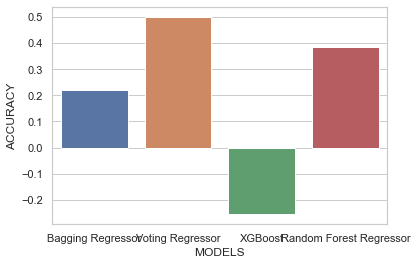

In [229]:
# bar plot 
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final, x="MODELS", y="ACCURACY")

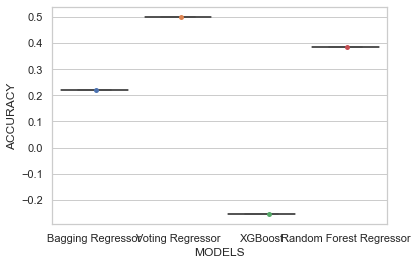

In [230]:
# box plot for overall Regression :
sns.set_style('whitegrid')

ax= sns.boxplot(x="MODELS",y=("ACCURACY"),data=final)
ax = sns.stripplot(x="MODELS", y=("ACCURACY"),data=final)
plt.show(sns)

In [231]:
# Voting Resgressio performs well compared with the other ensemble regression

In [232]:
# basically Resression will not be a Suitable for the classification type of Dataset. 